# Case Study 2: Decision Tree in Credit Risk Management

#                ——Ref: Explainable Machine Learning in Credit Risk Management


**Reference:**  
[1] Bussmann, N., Giudici, P., Marinelli, D., & Papenbrock, J. (2021) Explainable machine learning in credit risk management. <i>Computational Economics</i>, **57**, 203-216.
<!-- Niklas Bussmann, Paolo Giudici, Dimitri Marinelli, and Jochen Papenbrock. Explainable machine learning in credit risk management. *Computational Economics*, **57**: 203–216, 2021 -->

## Obejctives of the analysis

In this case study, we apply decision tree method to predict the credit risk of a large sample of small and medium enterprises.

<!-- The reason of making this case study is that Artificial Intelligence model can be used in credit risk management and, in particular, in measuring the risks that arise when credit is borrowed employing peer to peer lending platforms.  -->
The reason for making this case study is that the Artificial Intelligence model can be used in credit risk management, particularly in measuring the risks that arise when credit is borrowed by employing peer-to-peer lending platforms. 

The empirical analysis of about 15,000 small and medium companies asking for credit reveals that both risky and not risky borrowers ($Y$)  can be grouped according to a set of similar financial characteristics ($X$), which can be employed to explain their credit score and, therefore, to predict their future behaviour.

## Desciption of the data

There are two sheets in our xlsx file.

First, let's load the first sheet of the xlsx file.

In [3]:
import pandas as pd

In [5]:
#Load the first sheet of xlsx file 
data = pd.read_excel('final_dataset_smes.xlsx')
#pd.read_excel('/Users/ranjiang/Desktop/caseStudy2_DT/data/final_dataset_smes.xlsx')

* Tips: seprate operation functions and showing functions (data.head()) in different cells, since we may implement our operation functions more than one time by accident.

In [6]:
data.head()

,Unnamed: 0,status,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,...,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24
0,2,0,3.30,0.62,1.30,0.96,0.70,0.94,-21.75,-0.12,...,-0.01,1,1,1,1,7,25,8,36635,4635
1,3,0,-7.93,-0.19,0.87,1.35,1.34,225.95,-42.44,-0.59,...,-0.10,1,1,1,1,1,42,65,29970,4791
2,7,0,1.24,0.41,1.81,1.14,0.65,1.10,-10.84,-0.08,...,0.00,1,1,1,1,30,43,21,7052,4752
3,10,0,-1.16,-0.68,0.14,1.60,0.87,2.23,-16.29,-0.27,...,-0.07,1,1,1,1,48,31,12,4276,4771
4,12,0,-1.90,-0.86,0.47,0.42,0.42,-1.78,-13.83,-0.24,...,-0.17,1,1,1,1,0,53,156,3799,3212


In [7]:
# See the dimension of our data
data.shape

(15045, 26)

Sheet 1 is our main data.

* The sample size: 15045

* The number of columns: 25

* The first column: since it's cleaned data, the first column is a useless ID.

* V_1 to V_24: variables/features $X$, float

* Status (label $Y$): only 2 states: 0 and 1. 1 is defaulted, 0 is active, int

Then let's see the second sheet.

In [9]:
# Load the second sheet of the xlsx file
name = pd.read_excel('final_dataset_smes.xlsx',
                    sheet_name = "sheet2")
df_name = pd.DataFrame(name)

In [10]:
df_name.head()

,ID,FORMULA
0,V_1,(Total assets - Shareholders Funds)/Sharehold...
1,V_2,(Long term debt + Loans)/Shareholders Funds
2,V_3,Total assets/Total liabilties
3,V_4,Current assets/Current liabilties
4,V_5,(Current assets - Current assets: stocks)/Cur...


The second sheet shows the name of variablese V_1 to V_24 

## Exploratorty data analysis

In [11]:
# Remove the first column (Name column)
data = data.drop(data.columns[0], axis = 1)
df = pd.DataFrame(data)

In [12]:
df.head()

,status,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,...,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24
0,0,3.30,0.62,1.30,0.96,0.70,0.94,-21.75,-0.12,-0.53,...,-0.01,1,1,1,1,7,25,8,36635,4635
1,0,-7.93,-0.19,0.87,1.35,1.34,225.95,-42.44,-0.59,-8.12,...,-0.10,1,1,1,1,1,42,65,29970,4791
2,0,1.24,0.41,1.81,1.14,0.65,1.10,-10.84,-0.08,-0.21,...,0.00,1,1,1,1,30,43,21,7052,4752
3,0,-1.16,-0.68,0.14,1.60,0.87,2.23,-16.29,-0.27,-0.05,...,-0.07,1,1,1,1,48,31,12,4276,4771
4,0,-1.90,-0.86,0.47,0.42,0.42,-1.78,-13.83,-0.24,-0.23,...,-0.17,1,1,1,1,0,53,156,3799,3212


In [13]:
# Convert binary numbers to class
categories = {
    0: 'active',
    1: 'defaulted'   
} #categories is created in data structure of dictionary so as to use "map" function



In [14]:
#df["status"] = sta.apply(lambda x:categories [str (sta[x])])

df['status'] = df['status'].map(categories)  # a = a+1, overwrite

* Tips: mapping function is useful if we want to convert numebrs/names to names/numbers.

In [15]:
df.head()

,status,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,...,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24
0,active,3.30,0.62,1.30,0.96,0.70,0.94,-21.75,-0.12,-0.53,...,-0.01,1,1,1,1,7,25,8,36635,4635
1,active,-7.93,-0.19,0.87,1.35,1.34,225.95,-42.44,-0.59,-8.12,...,-0.10,1,1,1,1,1,42,65,29970,4791
2,active,1.24,0.41,1.81,1.14,0.65,1.10,-10.84,-0.08,-0.21,...,0.00,1,1,1,1,30,43,21,7052,4752
3,active,-1.16,-0.68,0.14,1.60,0.87,2.23,-16.29,-0.27,-0.05,...,-0.07,1,1,1,1,48,31,12,4276,4771
4,active,-1.90,-0.86,0.47,0.42,0.42,-1.78,-13.83,-0.24,-0.23,...,-0.17,1,1,1,1,0,53,156,3799,3212


In [16]:
# Add readableColNames to the df_name 
df_name['readableColNames'] = ["total assets divided by shareholder funds minus 1", "long term debt plus loans then divided by shareholder funds", 
                     "total Assets to total Liabilities", "Current Ratio", "current assets without stocks divided by current liabilities",
                     "Shareholders Funds plus Non current liabilities then divided by Fixed assets", "EBIT to interest paid", "profit before taxes plus interest paid then divided by total assets",
                     "profit or loss after tax/divided by shareholder funds", "operating revenue divided by total assets",
                     "sales divided by total assets", "interest paid divided by profit before tax plus interest paid",
                     "EBITDA to Interest Coverage Ratio", "EBITDA to operating revenue ratio", "EBITDA to sales",
                     "constraint EBIT", "constraint profit and losses before tax", "constraint financial profit and losses", 
                     "constraint profit and losses for period in th EUR", "trade payables divided by operating revenues",
                     "trade receivables divided by operating revenues", "inventories divided by operating revenues", "total revenue",
                     "Industry classification on NACE code, 4 digits precision"]

In [17]:
df_name.head()


,ID,FORMULA,readableColNames
0,V_1,(Total assets - Shareholders Funds)/Sharehold...,total assets divided by shareholder funds minus 1
1,V_2,(Long term debt + Loans)/Shareholders Funds,long term debt plus loans then divided by shar...
2,V_3,Total assets/Total liabilties,total Assets to total Liabilities
3,V_4,Current assets/Current liabilties,Current Ratio
4,V_5,(Current assets - Current assets: stocks)/Cur...,current assets without stocks divided by curre...


In [18]:
pd.set_option('expand_frame_repr', False) 
df_name

,ID,FORMULA,readableColNames
0,V_1,(Total assets - Shareholders Funds)/Sharehold...,total assets divided by shareholder funds minus 1
1,V_2,(Long term debt + Loans)/Shareholders Funds,long term debt plus loans then divided by shar...
2,V_3,Total assets/Total liabilties,total Assets to total Liabilities
3,V_4,Current assets/Current liabilties,Current Ratio
4,V_5,(Current assets - Current assets: stocks)/Cur...,current assets without stocks divided by curre...
5,V_6,(Shareholders Funds + Non current liabilities...,Shareholders Funds plus Non current liabilitie...
6,V_7,EBIT/interest paid,EBIT to interest paid
7,V_8,(Profit (loss) before tax + Interest paid)/To...,profit before taxes plus interest paid then di...
8,V_9,P/L after tax/Shareholders Funds,profit or loss after tax/divided by shareholde...
9,V_10,Operating revenues/Total assets,operating revenue divided by total assets


In [19]:
df.columns = ['status']+ df_name.loc[:,'readableColNames'].tolist()
# list operation ['a'] + ['b'] -> ['a', 'b']

In [20]:
df.head() 

,status,total assets divided by shareholder funds minus 1,long term debt plus loans then divided by shareholder funds,total Assets to total Liabilities,Current Ratio,current assets without stocks divided by current liabilities,Shareholders Funds plus Non current liabilities then divided by Fixed assets,EBIT to interest paid,profit before taxes plus interest paid then divided by total assets,profit or loss after tax/divided by shareholder funds,...,EBITDA to sales,constraint EBIT,constraint profit and losses before tax,constraint financial profit and losses,constraint profit and losses for period in th EUR,trade payables divided by operating revenues,trade receivables divided by operating revenues,inventories divided by operating revenues,total revenue,"Industry classification on NACE code, 4 digits precision"
0,active,3.30,0.62,1.30,0.96,0.70,0.94,-21.75,-0.12,-0.53,...,-0.01,1,1,1,1,7,25,8,36635,4635
1,active,-7.93,-0.19,0.87,1.35,1.34,225.95,-42.44,-0.59,-8.12,...,-0.10,1,1,1,1,1,42,65,29970,4791
2,active,1.24,0.41,1.81,1.14,0.65,1.10,-10.84,-0.08,-0.21,...,0.00,1,1,1,1,30,43,21,7052,4752
3,active,-1.16,-0.68,0.14,1.60,0.87,2.23,-16.29,-0.27,-0.05,...,-0.07,1,1,1,1,48,31,12,4276,4771
4,active,-1.90,-0.86,0.47,0.42,0.42,-1.78,-13.83,-0.24,-0.23,...,-0.17,1,1,1,1,0,53,156,3799,3212


In [21]:
#pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total number')

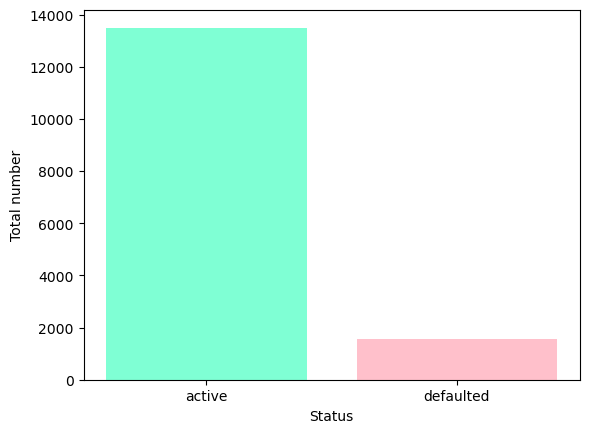

In [22]:
#plt.bar()
df['status']
x = ['active', 'defaulted']
y = [df[df['status']=='active'].shape[0], df[df['status']=='defaulted'].shape[0]] # count rows of the df
plt.bar(x,y,color=['aquamarine', 'pink'])
plt.xlabel('Status')
plt.ylabel('Total number')

We can find that the status 'defaulted'  is much less than 'active'.

Then, we see the proportion of defaulted companies within this dataset.

In [23]:
# The proportion of defaulted companies within this dataset
default = df [ df["status"] == "defaulted" ].shape[0]  / df.shape[0]
default

0.10269192422731804

Choose two variables in vector $X$, and see their relationships.

Text(0, 0.5, 'total revenue')

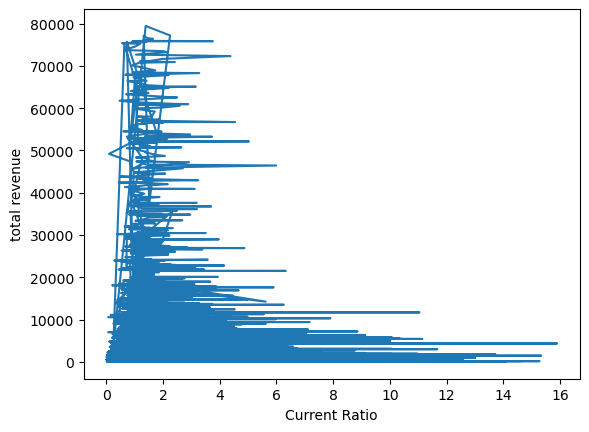

In [24]:
plt.plot(df['Current Ratio'], df['total revenue'])
#plt.show()
plt.xlabel('Current Ratio')
plt.ylabel('total revenue')

We also can choose other variables to find their relationships.

## Model Specific

### Modelling

#### Preprocessing 

In [25]:
# extract the variables which will not be used based on the paper
# out = [16,17,18,19,24]
# df.iloc[:,out]
df_droped = df.drop(df.columns[[16,17,18,19,24]], axis=1)


In [26]:
df_droped.head()

,status,total assets divided by shareholder funds minus 1,long term debt plus loans then divided by shareholder funds,total Assets to total Liabilities,Current Ratio,current assets without stocks divided by current liabilities,Shareholders Funds plus Non current liabilities then divided by Fixed assets,EBIT to interest paid,profit before taxes plus interest paid then divided by total assets,profit or loss after tax/divided by shareholder funds,operating revenue divided by total assets,sales divided by total assets,interest paid divided by profit before tax plus interest paid,EBITDA to Interest Coverage Ratio,EBITDA to operating revenue ratio,EBITDA to sales,trade payables divided by operating revenues,trade receivables divided by operating revenues,inventories divided by operating revenues,total revenue
0,active,3.30,0.62,1.30,0.96,0.70,0.94,-21.75,-0.12,-0.53,8.50,8.49,-0.05,-17.55,-0.01,-0.01,7,25,8,36635
1,active,-7.93,-0.19,0.87,1.35,1.34,225.95,-42.44,-0.59,-8.12,5.13,5.47,-0.02,-38.08,-0.10,-0.10,1,42,65,29970
2,active,1.24,0.41,1.81,1.14,0.65,1.10,-10.84,-0.08,-0.21,2.33,2.31,-0.09,0.62,0.00,0.00,30,43,21,7052
3,active,-1.16,-0.68,0.14,1.60,0.87,2.23,-16.29,-0.27,-0.05,2.66,2.68,-0.06,-11.62,-0.07,-0.07,48,31,12,4276
4,active,-1.90,-0.86,0.47,0.42,0.42,-1.78,-13.83,-0.24,-0.23,1.32,1.29,-0.07,-12.22,-0.16,-0.17,0,53,156,3799


In [27]:
# Split dataset into train and test (80% train and 20% validation) randomly
# import sklearn
from sklearn.model_selection import train_test_split

In [28]:
train, validation = train_test_split(df_droped, train_size = 0.8, random_state = 233)
#shuffle=False        ## one table split, validation; test, new table

See the sizes of the train set and the validation set respecitvely.

In [29]:
[train.size, validation.size]

[240720, 60180]

In [30]:
train.head()

,status,total assets divided by shareholder funds minus 1,long term debt plus loans then divided by shareholder funds,total Assets to total Liabilities,Current Ratio,current assets without stocks divided by current liabilities,Shareholders Funds plus Non current liabilities then divided by Fixed assets,EBIT to interest paid,profit before taxes plus interest paid then divided by total assets,profit or loss after tax/divided by shareholder funds,operating revenue divided by total assets,sales divided by total assets,interest paid divided by profit before tax plus interest paid,EBITDA to Interest Coverage Ratio,EBITDA to operating revenue ratio,EBITDA to sales,trade payables divided by operating revenues,trade receivables divided by operating revenues,inventories divided by operating revenues,total revenue
425,defaulted,26.05,1.38,1.04,0.84,0.77,0.21,33.40,0.05,0.81,2.24,2.22,0.03,96.81,0.06,0.06,12,142,93,2199
12375,active,19.51,0.00,1.05,1.25,1.25,19.22,66.54,0.03,0.26,6.11,6.11,0.02,80.08,0.01,0.01,0,1,27,393
13083,active,8.59,0.00,1.12,0.65,0.64,0.26,-14.39,-0.01,-0.14,0.05,0.05,-0.07,-2.18,-0.04,-0.04,109,0,0,166
6991,active,0.92,0.59,2.08,1.60,1.19,1.22,4.18,0.03,0.01,0.57,0.56,0.24,12.38,0.15,0.15,60,32,143,1490
10411,active,0.48,0.11,3.09,1.93,1.46,1.72,38.94,0.08,0.11,1.01,0.74,0.03,75.89,0.16,0.21,52,80,101,673


In [31]:
validation.head()

,status,total assets divided by shareholder funds minus 1,long term debt plus loans then divided by shareholder funds,total Assets to total Liabilities,Current Ratio,current assets without stocks divided by current liabilities,Shareholders Funds plus Non current liabilities then divided by Fixed assets,EBIT to interest paid,profit before taxes plus interest paid then divided by total assets,profit or loss after tax/divided by shareholder funds,operating revenue divided by total assets,sales divided by total assets,interest paid divided by profit before tax plus interest paid,EBITDA to Interest Coverage Ratio,EBITDA to operating revenue ratio,EBITDA to sales,trade payables divided by operating revenues,trade receivables divided by operating revenues,inventories divided by operating revenues,total revenue
4424,active,2.10,0.74,1.48,1.43,0.50,3.16,1.12,0.02,0.02,0.50,0.49,0.89,1.73,0.05,0.06,418,259,195,3398
10011,active,10.07,3.25,1.10,0.80,0.80,0.76,2.36,0.02,0.07,1.19,1.09,0.42,8.16,0.07,0.07,0,108,117,733
10142,active,9.13,0.00,1.11,1.11,1.11,243.41,286.87,0.14,0.97,1.22,1.22,0.00,287.09,0.11,0.11,0,0,0,713
9389,active,0.89,0.19,2.13,2.78,2.19,21.12,4.44,0.02,0.01,0.85,0.83,0.23,7.73,0.04,0.04,88,73,0,839
8551,active,8.82,5.06,1.11,1.85,1.68,5.61,2.18,0.04,0.01,1.21,1.17,0.46,3.80,0.06,0.06,25,80,158,1046


In [32]:
# The proportion of defaulted companies within this dataset
default_train = train [ train["status"] == "defaulted" ].shape[0]  / train.shape[0]
default_validation = validation [ validation["status"] == "defaulted" ].shape[0]  / validation.shape[0]
[default_train, default_validation]

[0.10335659687603856, 0.10003323363243602]

#### Construct a decision tree

In [33]:
from sklearn import tree 
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

<p>In this case, we choose entropy. There are some explanation of the entropy. </br>
<p>The aim of entropy is to find a way to encode information efficiently and without loss, where efficency means the short average length, no loss means encode all the information. </br>
<p>Suppose that a message has N possible states and each state is equiprobable, i.e. $P(i) = \frac{1}{N}$ </br>
<p>Then we need at least $log_2 N$ bits to encode it. </br>

Thus, the minimum length to encode the information:
$$
log_2 N = -log_2 \frac{1}{N} = -log_2 P
$$

Entropy is the minimum average encoding length of losslessly encoded event information that obeys a particular probability distribution of events, so we can calculate entropy (discrete) by
$$
Entropy = - \sum_i P(i) log_2 P(i)
$$
Where $P(i)$ is the probability of the $i^{th}$ information state.

In [34]:
train_x = train.drop(train.columns[0], axis = 1)
train_y = train['status']

In [35]:
classifier = classifier.fit(train_x, train_y)

Draw the decision tree.

In [36]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pydotplus
from IPython.display import Image

In [38]:
dot_data = tree.export_graphviz(classifier, feature_names=train_x.columns, class_names=['active','defaulted'], filled=True, 
                                out_file=None) 

In [39]:
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

InvocationException: GraphViz's executables not found

#### Prediction 

In [40]:
validation_x = validation.drop(validation.columns[0], axis = 1)
validation_y = validation['status']
validation_x.head()

,total assets divided by shareholder funds minus 1,long term debt plus loans then divided by shareholder funds,total Assets to total Liabilities,Current Ratio,current assets without stocks divided by current liabilities,Shareholders Funds plus Non current liabilities then divided by Fixed assets,EBIT to interest paid,profit before taxes plus interest paid then divided by total assets,profit or loss after tax/divided by shareholder funds,operating revenue divided by total assets,sales divided by total assets,interest paid divided by profit before tax plus interest paid,EBITDA to Interest Coverage Ratio,EBITDA to operating revenue ratio,EBITDA to sales,trade payables divided by operating revenues,trade receivables divided by operating revenues,inventories divided by operating revenues,total revenue
4424,2.10,0.74,1.48,1.43,0.50,3.16,1.12,0.02,0.02,0.50,0.49,0.89,1.73,0.05,0.06,418,259,195,3398
10011,10.07,3.25,1.10,0.80,0.80,0.76,2.36,0.02,0.07,1.19,1.09,0.42,8.16,0.07,0.07,0,108,117,733
10142,9.13,0.00,1.11,1.11,1.11,243.41,286.87,0.14,0.97,1.22,1.22,0.00,287.09,0.11,0.11,0,0,0,713
9389,0.89,0.19,2.13,2.78,2.19,21.12,4.44,0.02,0.01,0.85,0.83,0.23,7.73,0.04,0.04,88,73,0,839
8551,8.82,5.06,1.11,1.85,1.68,5.61,2.18,0.04,0.01,1.21,1.17,0.46,3.80,0.06,0.06,25,80,158,1046


In [37]:
[validation_x.shape, validation_y.shape]

[(3009, 19), (3009,)]

In [38]:
# Predict
predict_y = classifier.predict(validation_x)
predict_y

array(['active', 'active', 'active', ..., 'active', 'active', 'active'],
      dtype=object)

In [39]:
# Test our results
predict_y[3008] 
# pd.Series(predict_y,name='Real Status')

'active'

In [40]:
results = pd.concat([pd.Series(validation_y.tolist(),name='Truth'),pd.Series(predict_y,name='Predicted')], axis=1)
results

,Truth,Predicted
0,active,active
1,active,active
2,active,active
3,active,active
4,active,active
...,...,...
3004,active,active
3005,active,active
3006,active,active
3007,active,active


In [41]:
features = pd.DataFrame(validation_x)
features = features.reset_index(drop = True)

* Tips: Note that the index is different, so we need to drop it to maintain consistency of rows.

In [42]:
totalTable = pd.concat([features,pd.DataFrame(results)], axis=1)
totalTable

,total assets divided by shareholder funds minus 1,long term debt plus loans then divided by shareholder funds,total Assets to total Liabilities,Current Ratio,current assets without stocks divided by current liabilities,Shareholders Funds plus Non current liabilities then divided by Fixed assets,EBIT to interest paid,profit before taxes plus interest paid then divided by total assets,profit or loss after tax/divided by shareholder funds,operating revenue divided by total assets,...,interest paid divided by profit before tax plus interest paid,EBITDA to Interest Coverage Ratio,EBITDA to operating revenue ratio,EBITDA to sales,trade payables divided by operating revenues,trade receivables divided by operating revenues,inventories divided by operating revenues,total revenue,Truth,Predicted
0,2.10,0.74,1.48,1.43,0.50,3.16,1.12,0.02,0.02,0.50,...,0.89,1.73,0.05,0.06,418,259,195,3398,active,active
1,10.07,3.25,1.10,0.80,0.80,0.76,2.36,0.02,0.07,1.19,...,0.42,8.16,0.07,0.07,0,108,117,733,active,active
2,9.13,0.00,1.11,1.11,1.11,243.41,286.87,0.14,0.97,1.22,...,0.00,287.09,0.11,0.11,0,0,0,713,active,active
3,0.89,0.19,2.13,2.78,2.19,21.12,4.44,0.02,0.01,0.85,...,0.23,7.73,0.04,0.04,88,73,0,839,active,active
4,8.82,5.06,1.11,1.85,1.68,5.61,2.18,0.04,0.01,1.21,...,0.46,3.80,0.06,0.06,25,80,158,1046,active,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,13.96,0.00,1.07,1.10,1.04,1.21,1.34,0.04,0.11,0.84,...,0.74,2.40,0.10,0.10,16,0,0,1072,active,active
3005,19.77,3.78,1.05,0.94,0.72,0.75,2.10,0.02,0.05,2.52,...,0.47,6.94,0.03,0.03,28,79,30,393,active,active
3006,6.57,0.00,1.15,1.13,1.13,6.14,-94.08,-0.11,-0.54,2.41,...,-0.01,-89.12,-0.04,-0.04,0,104,65,1095,active,active
3007,5.46,0.52,1.18,1.17,1.04,2.42,2.88,0.02,0.05,1.10,...,0.35,4.56,0.03,0.03,33,147,229,685,active,active


#### Misclassification

Recall the confusion matrix.

In [43]:
# Method 1
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(totalTable['Truth'],totalTable['Predicted'])
confusion

array([[2623,   85],
       [ 188,  113]])

In [44]:
# Method 2
pd.crosstab(results['Truth'],results['Predicted'],
           rownames = ['Truth'], colnames = ['Pediction'])

Pediction,active,defaulted
Truth,,
active,2623,85
defaulted,188,113


$f_{10} =188$  $f_{01} = 85$, $f_{00}=2623$, $f_{11} = 113$

$$
Error Rate = \frac{\text{Number of wrong predictions}}{\text{Total Number of predictions}}
$$
Since this is a binary classification problem, we have:
$$
Error Rate = \frac{f_{10}+f_{01}}{f_{11}+f_{10}+f_{01}+f_{00}}
$$

In [45]:
# Error Rate
errorRate = (confusion[0][1] + confusion[1][0]) / (confusion[0][0] + confusion[0][1] + confusion[1][0] +confusion[1][1])
errorRate

0.09072781655034895

Then we find that Error Rate = 9.07%.

### Supplements

We also can implement the prediction by the XGboost model. 

Extreme Gradient Boosting (XGBoost) is a supervised model based on the combination of tree models with Gradient Boosting, and it's faster than tree model algorithms.

More information can see https://github.com/danpele/FINTECH_HO_2020/blob/main/3.%20Use%20Cases/2.%20Artificial%20Inteligence/Use%20Case%20III_Artificial%20Intelligence%20-%20Explainable%20Machine%20Learning%20in%20credit%20risk%20management/Replication%20code/Main_code_XAI_paper_clean_2020.R

## Summary

* **Content**:
In this case study we analyse credit risk management by the decision tree.

* **Objective**:
Predict the default status.

* **Model specific**:
We first construct a decision tree and predict the default status. Then, we calculate the missclassification.